In [1]:
import load_data
import cv2
import numpy as np

maxComponents = 15
img_count = 700

In [2]:
path1 = 'animeface-character-dataset/thumb'

In [3]:
data1, size = load_data.load(path1)

In [4]:
data = np.array(data1)
data = data[:img_count]
data.shape

(700, 70080)

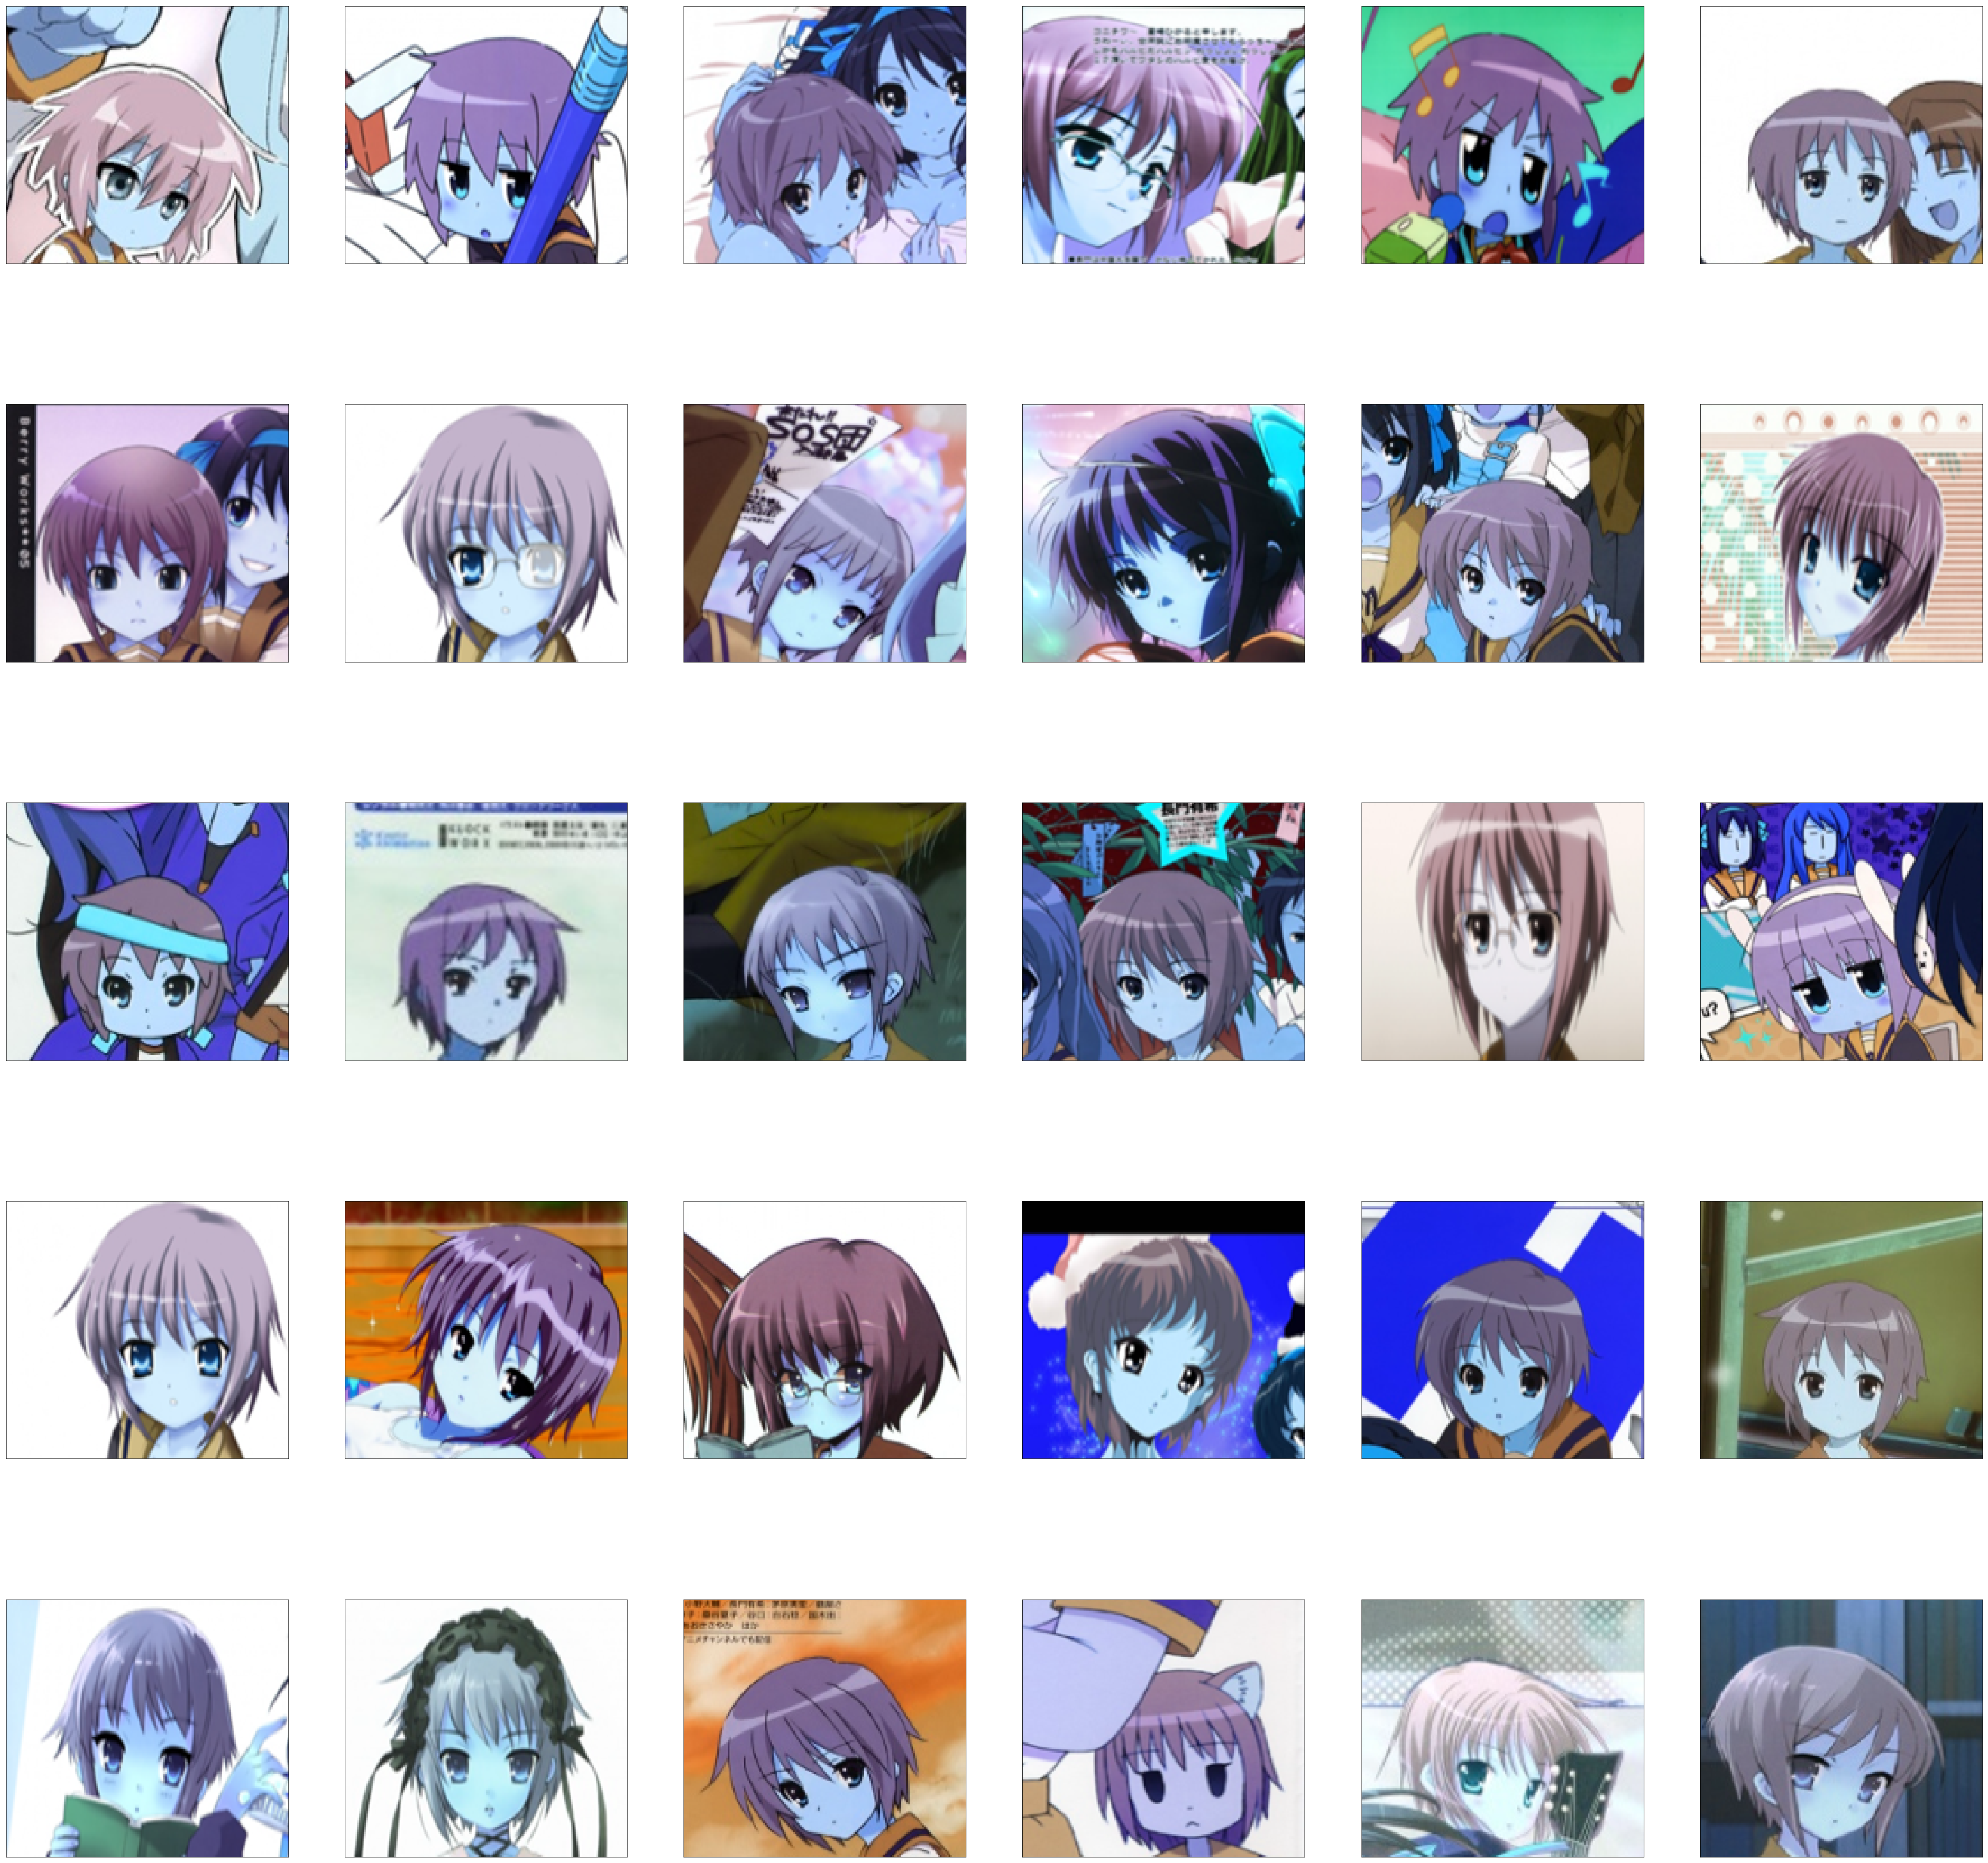

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(64, 64))
for i in range(1, 31):
    ax = plt.subplot(5, 6, i)
    plt.imshow(data1[i].reshape(size))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [5]:
mean, eigenVectors = cv2.PCACompute(data, None, cv2.PCA_DATA_AS_COL, maxComponents)

average = mean[0]
average = average.reshape(size)
print(average.shape)

(146, 160, 3)


In [6]:
import pickle
pickle.dump((mean, eigenVectors), open('anime.pickle', 'wb'))

In [5]:
import pickle
mean, eigenVectors = pickle.load(open('anime.pickle', 'rb'))
average = mean[0]
average = average.reshape(size)
print(average.shape)

(146, 160, 3)


In [6]:
cv2.imwrite('resultAnime/average.jpg', average)

True

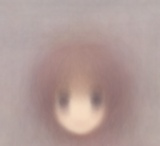

In [7]:
# Display average face

from PIL import Image as image

image.open('resultAnime/average.jpg')

In [8]:
eigenFaces = []

for e in eigenVectors:
    face = e.reshape(size)
    eigenFaces.append(face)

In [9]:
from IPython.display import display, Image
from io import BytesIO
import random

def make(*args):
    
    output = average
     
    for i in range(15):
        
        slider[i] = cv2.getTrackbarPos(str(i), "Trackbars")
        weight = (slider[i] - 50) * 300
        output = np.add(output, eigenFaces[i] * weight)
 
    #output = cv2.resize(output, (0,0), fx=2, fy=2)
    #cv2.imshow("Result", output)
    cv2.imwrite('resultAnime/output1.jpg', output)
    cv2.imshow('result', np.array(image.open('resultAnime/output1.jpg')))

In [ ]:
cv2.namedWindow("Trackbars", cv2.WINDOW_AUTOSIZE)
cv2.imshow('result', np.array(image.open('resultAnime/average.jpg')))
slider = []

for i in range(15):
    slider.append(50)
    cv2.createTrackbar(str(i), "Trackbars", 50, 100, make)

cv2.waitKey(0)
cv2.destroyAllWindows()